# How to summerize long text?

First how much we can do with Embedding

In [1]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel

In [2]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertModel.from_pretrained('bert-base-uncased',output_hidden_states = True)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [3]:
def get_tokens(tokenizer, inputs = '', max_seq_len = 512):
    input_ids = tf.constant(tokenizer.encode(inputs,truncation=False))[None, :max_seq_len]
    return input_ids

In [4]:
token_samples = tokenizer.encode(["I am Ameican.", "I have a headache.", "Shopping can be fun."])
tf.constant(token_samples)


<tf.Tensor: shape=(5,), dtype=int32, numpy=array([101, 100, 100, 100, 102], dtype=int32)>

In [12]:
os.chdir('/Users/itsukiogihara/Projects/NLP/')
curr_dir = os.getcwd()
File = "./text/quotes.txt"
with open(File, 'r') as f:
  contents = f.read()
contents = contents.split("\n")
lines = []
Files = []
for line in contents:
  if (len(line)>0):
    lines.append(line)


In [67]:
inputs = lines[13] #" ".join(words[0])
print(len(tokenizer.encode(inputs,truncation=True)))
tokens = tf.constant(tokenizer.encode(inputs,truncation=True))
token_list = []
shape_list = []
for i in range(len(lines)):
    tokens = tf.constant(tokenizer.encode(lines[i],truncation=True))
    token_list.append(tokens)
    shape_list.append(tokens.shape[0])
max(shape_list)



18


39

In [140]:
def get_embedding(model, tokenizer, inputs = '', max_seq_len = max(shape_list), truncation = True):
    input_ids = tf.constant(tokenizer.encode(inputs, truncation=truncation, padding=True, max_length=max_seq_len))
    outputs = model(input_ids)
    return outputs.last_hidden_state

# function above creates embeddings in the sape (768,) for each input
# embedding = get_embedding(model, tokenizer, inputs=lines, max_seq_len = max(shape_list), truncation=True)

In [123]:
embedding[0]

<tf.Tensor: shape=(768,), dtype=float32, numpy=
array([-3.86112928e-01,  4.89523441e-01, -3.26074272e-01, -3.93160254e-01,
       -5.50232291e-01,  1.33226871e-01,  1.22027409e+00,  3.90112638e-01,
       -1.32467777e-01, -1.80991217e-01, -3.95437092e-01, -2.48127609e-01,
       -2.59672791e-01,  3.38604838e-01,  4.32499647e-01,  1.08836569e-01,
       -1.04985043e-01,  2.86427855e-01,  6.85897589e-01, -1.65807307e-01,
       -3.46168607e-01,  1.81839630e-01, -2.02406049e-01, -3.43129337e-02,
       -9.69107375e-02, -1.28254920e-01,  9.49693173e-02, -1.25297338e-01,
        1.21799096e-01,  2.05639929e-01,  2.57110655e-01,  1.08012438e-01,
       -3.47819477e-01,  2.60918558e-01,  9.27791279e-03, -3.48034233e-01,
        2.79028714e-01, -1.76941708e-01, -2.54226848e-02,  2.40419105e-01,
       -2.57487088e-01,  2.49777243e-01,  2.55618274e-01, -8.93793553e-02,
        5.56305498e-02, -6.55779302e-01, -2.71236730e+00, -4.49513376e-01,
       -4.28267866e-01, -1.03335992e-01,  2.63501167

In [127]:
def cosine_sim(x, y):
    """derive cosine similarity of given 2 tensors

    Args:
        x (tf.tensor or np.vector): vector embedding #1
        y (tf.tensor or np.vector): vector embedding #2
        # the order does not matter 
    """
    from numpy import dot
    from numpy.linalg import norm

    result = dot(x, y)/(norm(x)*norm(y))
    return result
    
cosine_sim(embedding[0], embedding[4])

0.31944036

In [133]:
# matrix to store the adjacency mat
import numpy as np 
import pandas as pd
n = len(lines) 
adjacency_mat = np.zeros(shape=(n,n))
for i in range(n):
    for j in range(n):
        if j!=i:
            adjacency_mat[i,j] = cosine_sim(embedding[i], embedding[j])
pd.DataFrame(adjacency_mat)


,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.000000,0.376973,0.331726,0.324956,0.319440,0.323255,0.328546,0.330202,0.330978,0.331033,...,0.325189,0.320182,0.318897,0.315364,0.312663,0.314611,0.305718,0.304310,0.309265,0.309538
1,0.376973,0.000000,0.953848,0.941931,0.932588,0.927778,0.925295,0.920982,0.919168,0.916180,...,0.913000,0.911764,0.910416,0.910631,0.907068,0.906894,0.907944,0.907181,0.908801,0.907885
2,0.331726,0.953848,0.000000,0.996141,0.990209,0.984300,0.978549,0.974024,0.971778,0.968663,...,0.967298,0.965426,0.964275,0.964126,0.961912,0.961718,0.963924,0.964746,0.967165,0.967120
3,0.324956,0.941931,0.996141,0.000000,0.998123,0.994306,0.989773,0.986098,0.983653,0.980485,...,0.979466,0.977552,0.976001,0.975502,0.973576,0.973167,0.974645,0.975235,0.977438,0.976935
4,0.319440,0.932588,0.990209,0.998123,0.000000,0.998429,0.995234,0.992553,0.990148,0.987232,...,0.986769,0.985264,0.983606,0.982638,0.980902,0.980184,0.981156,0.981549,0.983183,0.982728
5,0.323255,0.927778,0.984300,0.994306,0.998429,0.000000,0.998727,0.996950,0.995012,0.992202,...,0.991166,0.989944,0.988763,0.987324,0.985079,0.984188,0.984085,0.984105,0.985340,0.984060
6,0.328546,0.925295,0.978549,0.989773,0.995234,0.998727,0.000000,0.999192,0.997752,0.995497,...,0.992816,0.992122,0.991182,0.989958,0.987427,0.986119,0.985183,0.984395,0.985261,0.983620
7,0.330202,0.920982,0.974024,0.986098,0.992553,0.996950,0.999192,0.000000,0.999258,0.997589,...,0.993082,0.992850,0.992532,0.991637,0.989720,0.988161,0.986392,0.985270,0.985334,0.982896
8,0.330978,0.919168,0.971778,0.983653,0.990148,0.995012,0.997752,0.999258,0.000000,0.999234,...,0.993234,0.993277,0.993545,0.993167,0.991565,0.990287,0.988115,0.986359,0.985752,0.982525
9,0.331033,0.916180,0.968663,0.980485,0.987232,0.992202,0.995497,0.997589,0.999234,0.000000,...,0.992693,0.993152,0.993677,0.993789,0.992821,0.991896,0.989850,0.987662,0.986285,0.982416


<AxesSubplot:>

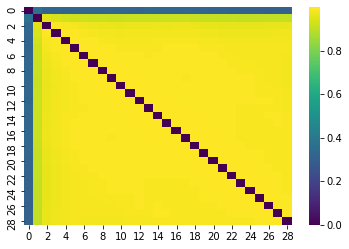

In [134]:
%matplotlib inline
import seaborn
import matplotlib.pyplot as plt
seaborn.heatmap(pd.DataFrame(adjacency_mat),cmap= 'viridis')